In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from scTools import input, preprocess, process
#from scTools import process
#import cello
import os
import anndata as ad
from anndata import AnnData

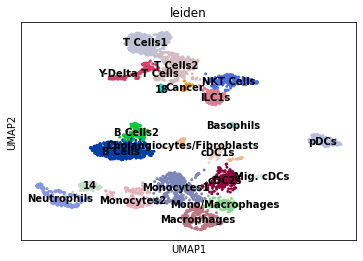

In [7]:
#Load files
subsample = None
onMac=True

whichTreatment = 2

treatment = ['NonfatVehicle', 'FriedVehicle', 'FriedCRV431', 'FriedLANI', 'FriedCRVLAN']
if onMac:
    pathPrefix='clusteringResults/'
else:
    pathPrefix = '/media/pmayo/Disc4/scRNA-seq_Gallay2020/alignments/'

adata = sc.read_h5ad(pathPrefix+treatment[whichTreatment]+'.h5ad')
adata.uns['log1p']["base"] = None
sc.pl.umap(adata, color=['leiden'], legend_loc='on data')
    

AAACCCAAGAGGTATT    Endothelial Cells1
AAACCCAAGCGTGCTC       Fibrotic Cells?
AAACCCAAGGCACCAA    Endothelial Cells2
AAACCCAAGGCATCGA                  pDCs
AAACCCATCAGCTCTC                  pDCs
                           ...        
TTTGGTTTCCATGATG             Monocytes
TTTGGTTTCGGTAGAG              T Cells1
TTTGTTGGTACAATAG              T Cells2
TTTGTTGGTATCCTTT           Hepatocytes
TTTGTTGTCTAGCCAA                    14
Name: leiden, Length: 6194, dtype: object


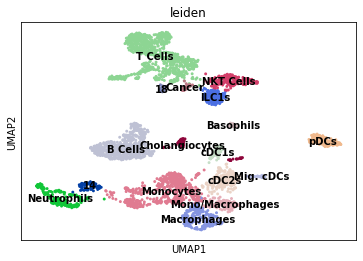

In [20]:
monoCells=['Monocytes', 'Monocytes1', 'Monocytes2', 'Monocytes4', 'Monocytes3']
lymphCells = ['T Cells', 'T Cells1', 'T Cell2', 'T Cells2', 'y-delta T Cells', 'Y-Delta T Cells']
endoCells = ['Endothelial Cells1', 'Endothelial Cells2', 'Endothelial Cells3']
bCells = ['B Cells', 'B Cells2']
'''
for i,cell in enumerate(adata.obs['leiden']):
    print(adata.obs['leiden'][i])
    if cell in cellType:
        print('Now Monocyte')
        adata.obs['leiden'][i]='Monocyte'
'''
#leiden = adata.obs['leiden'].map({x:('Monocytes' if x in cellType else x) for x in adata.obs['leiden']})
#adata.obs['leiden'] = leiden

process.replaceClusters('Monocytes', monoCells, adata)
process.replaceClusters('T Cells', lymphCells, adata)
process.replaceClusters('Macrophages', 'Macrophage/Monocyte', adata)
process.replaceClusters('Fibrotic Cells', 'Endothelial/Fibrotic Cells', adata)
process.replaceClusters('Endothelial Cells', endoCells, adata)
process.replaceClusters('Fibrotic', 'Fibrotic Cells?', adata)
process.replaceClusters('B Cells', bCells, adata)
process.replaceClusters('Cholangiocytes', 'Cholangiocytes/Fibroblasts', adata)


print(leiden)


#isCellType = [True if x in cellType else False for x in adata.obs['leiden']]
#adata.obs['leiden'][adata.obs['leiden'].isin(cellType)] = 'Monocyte'
#adata.obs['leiden'][adata.obs['leiden'].isin(cellType)] = adata.obs['leiden'][adata.obs['leiden'].isin(cellType)].map({x:'Monocyte' for x in cellType})
sc.pl.umap(adata, color=['leiden'], legend_loc='on data')
#sc.pl.umap(adata, color=['leiden'])


[[ 2.5445035e+00 -8.4484987e+00]
 [-2.5555711e+00  5.8163381e+00]
 [-5.3340468e+00  3.5452757e+00]
 ...
 [ 2.8482156e+00 -1.9212803e+01]
 [-6.4699739e-01  1.2235276e+00]
 [-1.6658371e-02  4.0971848e-01]]


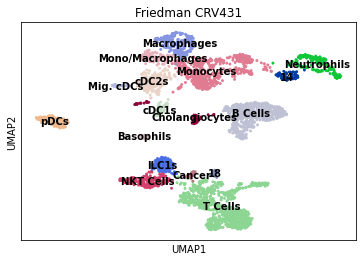

In [27]:

print(-adata.obsm['X_umap'])
adata.obsm['X_umap'] = -adata.obsm['X_umap']
sc.pl.umap(adata, color=['leiden'], legend_loc='on data', 
           title='Friedman CRV431', save='_friedmanCRV431')

In [ ]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data', 
           title='Friedman Vehicle' , save=True)